In [ ]:
import scipy
from scipy.special import binom as binom
import sympy as sp
#from sympy import factorial as fact
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import tree
from itertools import chain,combinations
import matplotlib.pyplot as plt
!pip install shap
import shap

In [ ]:
import random

def generate_df():
    diz={'age':{0:4 , 1:3.8 , 2:14.8 , 3:32.8 , 4:24.7 , 5:18.9},
                'sex':{0:66 , 1:44},
                'vehicle':{0:2 , 1:2 , 2:10 , 3:73.8 , 4:0.5 , 5:11.7},
                'role':{0:12.5 , 1:21.5 , 2:66},
                'road':{0:69.6 , 1:5.4 , 2:25},
                'month':{0:7.2 , 1:6.3 , 2:7.4 , 3:8.1 , 4:8.1 , 5:9.8 , 6:10.4 , 7:8.6 , 8:8.5 , 9:8.6 , 10:8 , 11:8}}

    df=pd.DataFrame()
    df.insert(0,'age',np.random.randint(0, 6, 200))
    df.insert(1,'sex',np.random.randint(0, 2, 200))

    vehicle=[]
    for i in range(0,200):
      if df.at[i,'age']==0:
        vehicle.append(np.random.randint(0,2)) #se ha meno di 14 o è a piedi o bici
      elif df.at[i,'age']==1:
        vehicle.append(np.random.randint(0,3)) #se ha tra i 15 e i 17 o è a piedi o bici o moto
      else:
        vehicle.append(np.random.randint(0,6))
    df.insert(2,'vehicle',vehicle)

    role=[]
    for i in range(0,200):
      if df.at[i,'vehicle']==0:
        role.append(2)   #se è a piedi il role è per forza pedone
      elif df.at[i,'age']==0:
        role.append(np.random.randint(0,2)) #se ha meno di 15 anni o è a piedi o è il passeggero
      else:
        role.append(np.random.randint(0,3))

    df.insert(3,'role',role)
    df.insert(4,'road',np.random.randint(0, 3, 200))
    df.insert(5,'month',np.random.randint(0, 12, 200))

    incidente=[]
    for i in range(0,200):
      age=diz['age'][df.at[i,'age']]
      sex=diz['sex'][df.at[i,'sex']]
      vehicle=diz['vehicle'][df.at[i,'vehicle']]
      role=diz['role'][df.at[i,'role']]
      road=diz['road'][df.at[i,'road']]
      month=diz['month'][df.at[i,'month']]
      #print(age+sex+vehicle+role+road+month)
      if age+sex+vehicle+role+road+month >=150:
        inc=1
      else:
        inc=0
      incidente.append(inc)

    df.insert(6,'accident', incidente)
    df.to_csv('/content/sample_data/incidenti.csv')

    return df

df=generate_df()
df

,age,sex,vehicle,role,road,month,accident
0,3,0,0,2,2,3,1
1,4,0,1,2,1,1,1
2,0,0,1,0,1,11,0
3,1,1,1,1,0,5,1
4,2,0,3,1,2,5,1
...,...,...,...,...,...,...,...
195,1,0,0,2,2,11,1
196,2,1,1,2,1,7,0
197,2,0,5,0,2,8,0
198,5,1,2,0,0,9,1


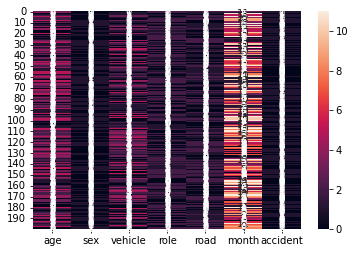

In [ ]:
import numpy as np
from pandas import DataFrame
import seaborn as sns
%matplotlib inline

sns.heatmap(df, annot=True)

In [ ]:
count={'age':df['age'].value_counts() , 'sex':df['sex'].value_counts() , 'vehicle':df['vehicle'].value_counts() ,
       'role':df['role'].value_counts() , 'road':df['road'].value_counts() , 'month':df['month'].value_counts()}

print(count)
count2 = df.groupby(['age']).count()
print(count2)

{'age': 1    45
3    35
2    33
5    29
4    29
0    29
Name: age, dtype: int64, 'sex': 1    102
0     98
Name: sex, dtype: int64, 'vehicle': 1    55
0    48
2    34
4    26
3    21
5    16
Name: vehicle, dtype: int64, 'role': 2    92
1    54
0    54
Name: role, dtype: int64, 'road': 1    79
2    68
0    53
Name: road, dtype: int64, 'month': 11    22
9     20
1     19
7     18
6     18
5     17
2     17
8     16
10    15
4     15
3     13
0     10
Name: month, dtype: int64}
     sex  vehicle  role  road  month  accident
age                                           
0     29       29    29    29     29        29
1     45       45    45    45     45        45
2     33       33    33    33     33        33
3     35       35    35    35     35        35
4     29       29    29    29     29        29
5     29       29    29    29     29        29


## CASO DI CLASSFICAZIONE:

In [ ]:
y  =  df[df.columns[-1]]
X  =  df[df.columns[:-1]]
y = y.to_numpy()
X = X.to_numpy()
train_X, val_X, train_y, val_y  =  train_test_split(X, y, test_size = 0.3) #y è le cose che deve imparare ad indovinare

def train():
  return  tree.DecisionTreeClassifier(random_state = 0).fit(train_X, train_y)

my_model = train()
data_array=df.columns[:-1].copy()

varie possibili value functions:


In [ ]:
'''
def mean_val(S,val_X,val_y,my_model):
  average = []
  for n in range(0,len(val_y)-1):
      x_1 = val_X[n,:].copy()
      x_2 = df[df.columns[:-1]].copy().mean(axis = 0)
      for j in S:  #magari vettorialmente
          ind = list(data_array).index(j)
          x_2[ind] = x_1[ind]   #ora x_2 differisce da x_3 solo per valori di S
      pred = my_model.predict(np.array(x_2).reshape(1,-1))
      average.append(1-abs(pred-val_y[n])) #vettore di scarti dalla media
      #print([pred,val_y[n]])
  worst = max([abs(x) for x in average])
  if worst == 0:
    return 1
  return (sum(average)/len(average))/worst
  return sum(average)/len(average)
'''

'\ndef mean_val(S,val_X,val_y,my_model):\n  average = []\n  for n in range(0,len(val_y)-1):\n      x_1 = val_X[n,:].copy()\n      x_2 = df[df.columns[:-1]].copy().mean(axis = 0)\n      for j in S:  #magari vettorialmente\n          ind = list(data_array).index(j)\n          x_2[ind] = x_1[ind]   #ora x_2 differisce da x_3 solo per valori di S\n      pred = my_model.predict(np.array(x_2).reshape(1,-1))\n      average.append(1-abs(pred-val_y[n])) #vettore di scarti dalla media\n      #print([pred,val_y[n]])\n  worst = max([abs(x) for x in average])\n  if worst == 0:\n    return 1\n  return (sum(average)/len(average))/worst\n  return sum(average)/len(average)\n'

In [ ]:
'''
def deterministic_val(S,val_X,val_y,my_model):
  average = []
  for n in range(0,len(val_y)-1):
      x_1 = val_X[n,:].copy()
      diff = []
      for k in range(0,len(val_y)-1): #200 è arbitrario, serve molte grande (più è meglio è, magari per ogni dato ma forse è too much)
          x_2 = val_X[k,:].copy()
          for j in S:  #magari vettorialmente
            ind = list(data_array).index(j)
            x_2[ind] = x_1[ind]   #ora x_2 differisce da x_3 solo per valori di S
          pred = my_model.predict(np.array(x_2).reshape(1,-1))
          diff.append(1-abs(pred-val_y[n]))
          #print([pred,val_y[n]])
      average.append(sum(diff)/len(diff)) #vettore di scarti medi
  worst = max([abs(x) for x in average])
  if worst == 0:
    return 1
  return (sum(average)/len(average))/worst
  return sum(average)/len(average)
  '''

'\ndef deterministic_val(S,val_X,val_y,my_model):\n  average = []\n  for n in range(0,len(val_y)-1):\n      x_1 = val_X[n,:].copy()\n      diff = []\n      for k in range(0,len(val_y)-1): #200 è arbitrario, serve molte grande (più è meglio è, magari per ogni dato ma forse è too much)\n          x_2 = val_X[k,:].copy()\n          for j in S:  #magari vettorialmente\n            ind = list(data_array).index(j)\n            x_2[ind] = x_1[ind]   #ora x_2 differisce da x_3 solo per valori di S\n          pred = my_model.predict(np.array(x_2).reshape(1,-1))\n          diff.append(1-abs(pred-val_y[n]))\n          #print([pred,val_y[n]])\n      average.append(sum(diff)/len(diff)) #vettore di scarti medi\n  worst = max([abs(x) for x in average])\n  if worst == 0:\n    return 1\n  return (sum(average)/len(average))/worst\n  return sum(average)/len(average)\n  '

calcolo shapley values usando diversi metodi:


In [ ]:
'''
def true_shap_values(data_array,val_X,val_y,my_model):
  card=len(data_array)
  shap=np.zeros(card)
  cont=0
  for feature in data_array:
      for size_of_S in range(1,card):
        subs=[list(S) for S in combinations(data_array.copy().drop(feature),size_of_S)]
        coeff=(1/binom(card,size_of_S))/(card-size_of_S)
        shap[cont]+=coeff*sum([mean_val(S+[feature],val_X,val_y,my_model)-mean_val(S,val_X,val_y,my_model) for S in subs])
        #print([[mean_val(S+[feature],val_X,val_y)-mean_val(S,val_X,val_y)] for S in subs])
      shap[cont]+=1/card*sum([mean_val(S,val_X,val_y,my_model) for S in subs if len(S)==1])
      cont+=1
  return shap
  '''

'\ndef true_shap_values(data_array,val_X,val_y,my_model):\n  card=len(data_array)\n  shap=np.zeros(card)\n  cont=0\n  for feature in data_array:\n      for size_of_S in range(1,card):\n        subs=[list(S) for S in combinations(data_array.copy().drop(feature),size_of_S)]\n        coeff=(1/binom(card,size_of_S))/(card-size_of_S)\n        shap[cont]+=coeff*sum([mean_val(S+[feature],val_X,val_y,my_model)-mean_val(S,val_X,val_y,my_model) for S in subs])\n        #print([[mean_val(S+[feature],val_X,val_y)-mean_val(S,val_X,val_y)] for S in subs])\n      shap[cont]+=1/card*sum([mean_val(S,val_X,val_y,my_model) for S in subs if len(S)==1])\n      cont+=1\n  return shap\n  '

In [ ]:
'''
def true_shap_values2(data_array,val_X,val_y,my_model):
  card=len(data_array)
  shap=np.zeros(card)
  cont=0
  for feature in data_array:
      for size_of_S in range(1,card):
        subs=[list(S) for S in combinations(data_array.copy().drop(feature),size_of_S)]
        coeff=(1/binom(card,size_of_S))/(card-size_of_S)
        shap[cont]+=coeff*sum([deterministic_val(S+[feature],val_X,val_y,my_model)-deterministic_val(S,val_X,val_y,my_model) for S in subs])
      shap[cont]+=1/card*sum([deterministic_val(S,val_X,val_y,my_model) for S in subs if len(S)==1])
      cont+=1
  return shap
'''

'\ndef true_shap_values2(data_array,val_X,val_y,my_model):\n  card=len(data_array)\n  shap=np.zeros(card)\n  cont=0\n  for feature in data_array:\n      for size_of_S in range(1,card):\n        subs=[list(S) for S in combinations(data_array.copy().drop(feature),size_of_S)]\n        coeff=(1/binom(card,size_of_S))/(card-size_of_S)\n        shap[cont]+=coeff*sum([deterministic_val(S+[feature],val_X,val_y,my_model)-deterministic_val(S,val_X,val_y,my_model) for S in subs])\n      shap[cont]+=1/card*sum([deterministic_val(S,val_X,val_y,my_model) for S in subs if len(S)==1])\n      cont+=1\n  return shap\n'

In [ ]:
'''
s=[0,0,0,0,0,0]
y_min=[5,5,5,5,5,5]
y_max=[-5,-5,-5,-5,-5,-5]
for x in range(10):
  df=generate_df()
  data_array=df.columns[:-1].copy()
  y  =  df[df.columns[-1]]
  X  =  df[df.columns[:-1]]
  y = y.to_numpy()
  X = X.to_numpy()
  train_X, val_X, train_y, val_y  =  train_test_split(X, y, test_size = 0.3) #y è le cose che deve imparare ad indovinare
  my_model = tree.DecisionTreeClassifier(random_state = 0).fit(train_X, train_y)
  v=true_shap_values(data_array,val_X,val_y,my_model)
  print(v)
  y_min=[min(y_min[j],v[j]) for j in range(len(data_array))]
  y_max=[max(y_max[j],v[j]) for j in range(len(data_array))]
  #print(y_min)
  #print(y_max)
  s=[s[j]+v[j] for j in range(len(data_array))]
print(s) #è 10x il valore reale cioè la media

s=[i/10 for i in s]
y_min=[abs(s[j]-y_min[j]) for j in range(len(data_array))]
y_max=[abs(s[j]-y_max[j]) for j in range(len(data_array))]
y_error=[y_min,y_max]
#plt.plot()
plt.xlabel('features')
plt.ylabel('average Shapley values')
plt.errorbar(data_array, s,
             yerr = y_error,
             fmt ='o')
plt.savefig('fig1.jpg')
'''

"\ns=[0,0,0,0,0,0]\ny_min=[5,5,5,5,5,5]\ny_max=[-5,-5,-5,-5,-5,-5]\nfor x in range(10):\n  df=generate_df()\n  data_array=df.columns[:-1].copy()\n  y  =  df[df.columns[-1]]\n  X  =  df[df.columns[:-1]]\n  y = y.to_numpy()\n  X = X.to_numpy()\n  train_X, val_X, train_y, val_y  =  train_test_split(X, y, test_size = 0.3) #y è le cose che deve imparare ad indovinare\n  my_model = tree.DecisionTreeClassifier(random_state = 0).fit(train_X, train_y)\n  v=true_shap_values(data_array,val_X,val_y,my_model)\n  print(v)\n  y_min=[min(y_min[j],v[j]) for j in range(len(data_array))]\n  y_max=[max(y_max[j],v[j]) for j in range(len(data_array))]\n  #print(y_min)\n  #print(y_max)\n  s=[s[j]+v[j] for j in range(len(data_array))]\nprint(s) #è 10x il valore reale cioè la media\n\ns=[i/10 for i in s]\ny_min=[abs(s[j]-y_min[j]) for j in range(len(data_array))]\ny_max=[abs(s[j]-y_max[j]) for j in range(len(data_array))]\ny_error=[y_min,y_max]\n#plt.plot()\nplt.xlabel('features')\nplt.ylabel('average Shapley 

In [ ]:
'''
s=[0,0,0,0,0,0]
y_min=[5,5,5,5,5,5]
y_max=[-5,-5,-5,-5,-5,-5]
for x in range(10):
  df=generate_df()
  data_array=df.columns[:-1].copy()
  y  =  df[df.columns[-1]]
  X  =  df[df.columns[:-1]]
  y = y.to_numpy()
  X = X.to_numpy()
  train_X, val_X, train_y, val_y  =  train_test_split(X, y, test_size = 0.3) #y è le cose che deve imparare ad indovinare
  my_model = tree.DecisionTreeClassifier(random_state = 0).fit(train_X, train_y)
  v=true_shap_values2(data_array,val_X,val_y,my_model)
  print(v)
  y_min=[min(y_min[j],v[j]) for j in range(len(data_array))]
  y_max=[max(y_max[j],v[j]) for j in range(len(data_array))]
  #print(y_min)
  #print(y_max)
  s=[s[j]+v[j] for j in range(len(data_array))]
print(s) #è 10x il valore reale cioè la media

s=[i/10 for i in s]
y_min=[abs(s[j]-y_min[j]) for j in range(len(data_array))]
y_max=[abs(s[j]-y_max[j]) for j in range(len(data_array))]
y_error=[y_min,y_max]
#plt.plot()
plt.xlabel('features')
plt.ylabel('average Shapley values')
plt.errorbar(data_array, s,
             yerr = y_error,
             fmt ='o')
plt.savefig('fig2.jpg')
'''

"\ns=[0,0,0,0,0,0]\ny_min=[5,5,5,5,5,5]\ny_max=[-5,-5,-5,-5,-5,-5]\nfor x in range(10):\n  df=generate_df()\n  data_array=df.columns[:-1].copy()\n  y  =  df[df.columns[-1]]\n  X  =  df[df.columns[:-1]]\n  y = y.to_numpy()\n  X = X.to_numpy()\n  train_X, val_X, train_y, val_y  =  train_test_split(X, y, test_size = 0.3) #y è le cose che deve imparare ad indovinare\n  my_model = tree.DecisionTreeClassifier(random_state = 0).fit(train_X, train_y)\n  v=true_shap_values2(data_array,val_X,val_y,my_model)\n  print(v)\n  y_min=[min(y_min[j],v[j]) for j in range(len(data_array))]\n  y_max=[max(y_max[j],v[j]) for j in range(len(data_array))]\n  #print(y_min)\n  #print(y_max)\n  s=[s[j]+v[j] for j in range(len(data_array))]\nprint(s) #è 10x il valore reale cioè la media\n\ns=[i/10 for i in s]\ny_min=[abs(s[j]-y_min[j]) for j in range(len(data_array))]\ny_max=[abs(s[j]-y_max[j]) for j in range(len(data_array))]\ny_error=[y_min,y_max]\n#plt.plot()\nplt.xlabel('features')\nplt.ylabel('average Shapley

con molti modelli invece:

In [ ]:
def multiple_train(df):
  num_array = list(range(len(df.columns[:-1])))
  df.columns = num_array+[6]
  y  =  (df[6])
  y = y.to_numpy()

  power_set = [list(item) for item in chain.from_iterable(combinations(num_array, r) for r in range(len(num_array)+1))]
  del power_set[0]
  my_models={}
  for S in power_set:
    S = sorted(S)
    X  =  df[S]
    X = X.to_numpy()
    train_X, val_X, train_y, val_y  =  train_test_split(X, y, test_size = 0.2)
    my_models.update({str(S)  :  tree.DecisionTreeClassifier(random_state = 0).fit(train_X, train_y)})
  return my_models

my_models = multiple_train(df.copy())
print(my_models)

{'[0]': DecisionTreeClassifier(random_state=0), '[1]': DecisionTreeClassifier(random_state=0), '[2]': DecisionTreeClassifier(random_state=0), '[3]': DecisionTreeClassifier(random_state=0), '[4]': DecisionTreeClassifier(random_state=0), '[5]': DecisionTreeClassifier(random_state=0), '[0, 1]': DecisionTreeClassifier(random_state=0), '[0, 2]': DecisionTreeClassifier(random_state=0), '[0, 3]': DecisionTreeClassifier(random_state=0), '[0, 4]': DecisionTreeClassifier(random_state=0), '[0, 5]': DecisionTreeClassifier(random_state=0), '[1, 2]': DecisionTreeClassifier(random_state=0), '[1, 3]': DecisionTreeClassifier(random_state=0), '[1, 4]': DecisionTreeClassifier(random_state=0), '[1, 5]': DecisionTreeClassifier(random_state=0), '[2, 3]': DecisionTreeClassifier(random_state=0), '[2, 4]': DecisionTreeClassifier(random_state=0), '[2, 5]': DecisionTreeClassifier(random_state=0), '[3, 4]': DecisionTreeClassifier(random_state=0), '[3, 5]': DecisionTreeClassifier(random_state=0), '[4, 5]': Decisio

In [ ]:
def nelle_pos(v,ind):
  if len(ind)==1:
    return v[ind]
  return [v[x] for x in ind]

def shapley_mult(my_models,data_array,observation):
  card=len(data_array)
  shap=np.zeros(card)
  cont=0
  for feature in range(len(data_array)):
      for size_of_S in range(1,card):
        set_without_feat=[d for d in data_array if d!=feature]
        subs = [sorted(list(S)) for S in combinations(set_without_feat,size_of_S)]
        coeff=(1/binom(card,size_of_S))*1/(card-size_of_S)
        l = 0
        r = 0
        for S in subs:
          r+= my_models[str(S)].predict(np.array(nelle_pos(observation,S)).reshape(1,-1))
          l+= my_models[str(sorted(S+[feature]))].predict(np.array(nelle_pos(observation,sorted(S+[feature]))).reshape(1,-1))
        shap[cont]+=coeff*(l-r)
      shap[cont]+=1/card*sum([my_models[str([it])].predict(np.array(observation[it]).reshape(1,-1)) for it in set_without_feat])
      cont+=1
  return shap

In [ ]:
'''
s=[0,0,0,0,0,0]
y_min=[5,5,5,5,5,5]
y_max=[-5,-5,-5,-5,-5,-5]
num_array=list(range(len(data_array)))
#power_set = [sorted(list(item)) for item in chain.from_iterable(combinations(num_array, r) for r in range(len(data_array)+1))]
#del power_set[0]
#expected=sum([my_models[str(S)].predict(np.array(nelle_pos(row,S)).reshape(1,-1)) for row in val_X for S in power_set])/(len(val_y)*len(power_set))
expected=sum([my_models[str(num_array)].predict(np.array(row).reshape(1,-1)) for row in val_X])/len(val_y)
print(expected)
for row in val_X:
  df = generate_df()
  my_models = multiple_train(df)
  v=shapley_mult(my_models,num_array,row)
  y_min=[min(y_min[j],v[j]) for j in range(len(data_array))]
  y_max=[max(y_max[j],v[j]) for j in range(len(data_array))]
  #print(v)
  s+=v
  print(expected+sum(v))
  print(my_models[str(list(range(len(df.columns[:-1]))))].predict(np.array(row).reshape(1,-1)))


#print(row)
#shap.force_plot(expected, v, row)


s=s/len(val_y)
y_min=[abs(s[j]-y_min[j]) for j in range(len(data_array))]
y_max=[abs(s[j]-y_max[j]) for j in range(len(data_array))]
y_error=[y_min,y_max]
#plt.plot()
plt.errorbar(data_array, s,
             yerr = y_error,
             fmt ='o')
             '''

"\ns=[0,0,0,0,0,0]\ny_min=[5,5,5,5,5,5]\ny_max=[-5,-5,-5,-5,-5,-5]\nnum_array=list(range(len(data_array)))\n#power_set = [sorted(list(item)) for item in chain.from_iterable(combinations(num_array, r) for r in range(len(data_array)+1))]\n#del power_set[0]\n#expected=sum([my_models[str(S)].predict(np.array(nelle_pos(row,S)).reshape(1,-1)) for row in val_X for S in power_set])/(len(val_y)*len(power_set))\nexpected=sum([my_models[str(num_array)].predict(np.array(row).reshape(1,-1)) for row in val_X])/len(val_y)\nprint(expected)\nfor row in val_X:\n  df = generate_df()\n  my_models = multiple_train(df)\n  v=shapley_mult(my_models,num_array,row)\n  y_min=[min(y_min[j],v[j]) for j in range(len(data_array))]\n  y_max=[max(y_max[j],v[j]) for j in range(len(data_array))]\n  #print(v)\n  s+=v\n  print(expected+sum(v))\n  print(my_models[str(list(range(len(df.columns[:-1]))))].predict(np.array(row).reshape(1,-1)))\n\n\n#print(row)\n#shap.force_plot(expected, v, row)\n\n\ns=s/len(val_y)\ny_min=[abs

senza val con una sola macchina:

In [ ]:
def metti_in(row,observation,S):
  return [row[x] if x not in S else observation[x] for x in range(len(data_array))]

def shapley_expect(my_model,data_array,observation,val_X):
  card=len(data_array)
  shap=np.zeros(card)
  cont=0
  for feature in range(len(data_array)):
      for size_of_S in range(1,card):
        set_without_feat=[d for d in data_array if d!=feature]
        subs = [sorted(list(S)) for S in combinations(set_without_feat,size_of_S)]
        coeff=(1/binom(card,size_of_S))*1/(card-size_of_S)
        l = 0
        r = 0
        for S in subs:
          for row in val_X:
            r+= my_model.predict(np.array(metti_in(row,observation,S)).reshape(1,-1))
            l+= my_model.predict(np.array(metti_in(row,observation,sorted(S+[feature]))).reshape(1,-1))
        shap[cont]+=coeff*(l-r)/len(val_y)
      cont+=1
  return shap

[0.53333333]


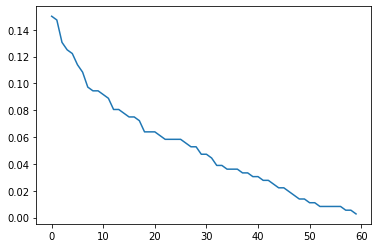

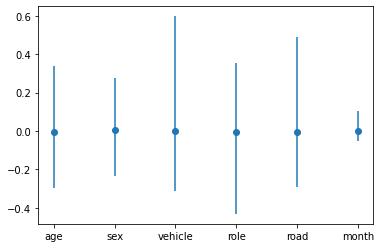

<Figure size 432x288 with 0 Axes>

In [ ]:
s=[0,0,0,0,0,0]
y_min=[5,5,5,5,5,5]
y_max=[-5,-5,-5,-5,-5,-5]
c=0
err=np.zeros(len(val_y))
expected=sum([my_model.predict(np.array(row).reshape(1,-1)) for row in val_X])/len(val_y)
print(expected)
for row in val_X:
  df=generate_df()
  my_model = train()
  v=shapley_expect(my_model,list(range(len(df.columns[:-1]))),row,val_X)
  #print(v)
  y_min=[min(y_min[j],v[j]) for j in range(len(data_array))]
  y_max=[max(y_max[j],v[j]) for j in range(len(data_array))]
  s+=v
  guess=my_model.predict(np.array(row).reshape(1,-1))
  err[c]=abs(expected+sum(v)-guess)
  c+=1

#print(train_y.mean(axis = 0))
plt.plot(sorted(err,reverse=True))
plt.show()
plt.savefig('fig3c.jpg')

avg_shap=s/len(val_y)
y_min=[abs(avg_shap[j]-y_min[j]) for j in range(len(data_array))]
y_max=[abs(avg_shap[j]-y_max[j]) for j in range(len(data_array))]
y_error=[y_min,y_max]
plt.errorbar(data_array, avg_shap,
             yerr = y_error,
             fmt ='o')
plt.show()
plt.savefig('fig3b.jpg')

In [ ]:
'''
ex = shap.TreeExplainer(my_model)
shap_values = ex.shap_values(row)
print(row)
shap.force_plot(1-sum(v), v, row,feature_names=data_array, matplotlib=True,show=False)
plt.show()
print(shap_values)
print(v)
#shap.summary_plot(shap_values, val_X[:,-1])
'''

'\nex = shap.TreeExplainer(my_model)\nshap_values = ex.shap_values(row)\nprint(row)\nshap.force_plot(1-sum(v), v, row,feature_names=data_array, matplotlib=True,show=False)\nplt.show()\nprint(shap_values)\nprint(v)\n#shap.summary_plot(shap_values, val_X[:,-1])\n'

e se ora faccio la seconda macchina che lavora solo su quella:

[20.0, 11.0, 9.0, 35.0, 19.0, 11.0, 8.0, 29.0, 7.0]


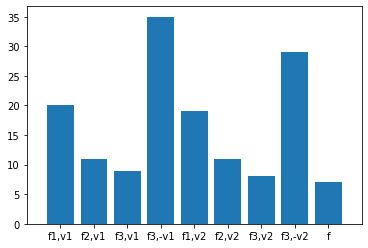

In [ ]:
locationsv1=[[4],[3,4],[2,3,4],[0,1,5]]
locationsv2=[[3],[3,4],[1,3,4],[0,2,5]]

df=generate_df().copy()
y  =  df[df.columns[-1]]
X  =  df[df.columns[:-1]]
y = y.to_numpy()
X = X.to_numpy()
train_X, val_X, train_y, val_y  =  train_test_split(X, y, test_size = 0.3) #y è le cose che deve imparare ad indovinare

fasterr=np.zeros((len(val_y),9))
err=np.zeros(len(val_y))
for turn in range(len(val_y)):
  df=generate_df().copy()
  y  =  df[df.columns[-1]]
  X  =  df[df.columns[:-1]]
  y = y.to_numpy()
  X = X.to_numpy()
  train_X, val_X, train_y, val_y  =  train_test_split(X, y, test_size = 0.3) #y è le cose che deve imparare ad indovinare
  my_model = tree.DecisionTreeClassifier(random_state = 0).fit(train_X, train_y)
  guess = my_model.predict(np.array(val_X[turn,:]).reshape(1,-1))
  f1=[]
  for t1 in locationsv1:
    faster_model1 = tree.DecisionTreeClassifier(random_state = 0).fit(train_X[:,t1], train_y)
    fast_guess1 = faster_model1.predict(np.array(val_X[turn,t1]).reshape(1,-1))
    f1.append(fast_guess1)
  f2=[]
  for t2 in locationsv2:
    faster_model2 = tree.DecisionTreeClassifier(random_state = 0).fit(train_X[:,t2], train_y)
    fast_guess2 = faster_model2.predict(np.array(val_X[turn,t2]).reshape(1,-1))
    f2.append(fast_guess2)
  fasterr[turn,:]=[f1[0]-val_y[turn],f1[1]-val_y[turn],f1[2]-val_y[turn],f1[3]-val_y[turn],f2[0]-val_y[turn],f2[1]-val_y[turn],f2[2]-val_y[turn],f2[3]-val_y[turn],guess-val_y[turn]]

#print(fasterr)
fasterr=([sum([abs(fasterr[i,j]) for i in range(len(val_y))]) for j in range(9)])
print(fasterr)
#plt.hist(fasterr)

fig, ax = plt.subplots()
ax.bar(range(9), fasterr, width=0.8, align='center')
ax.set(xticks=range(9), xlim=[-1, 9])
ax.set_xticklabels(['f1,v1','f2,v1','f3,v1','f3,-v1','f1,v2','f2,v2','f3,v2','f3,-v2','f'])

plt.show()